In [3]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import tensorflow.keras
import numpy as np
#from sklearn.utils import shuffle
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#load the data
from tensorflow.keras.datasets.mnist import load_data
(train_datasets, train_labels), (test_datasets, test_labels) = load_data()

In [5]:
from tensorflow.keras import backend as K
print(K.image_data_format())

channels_last


4


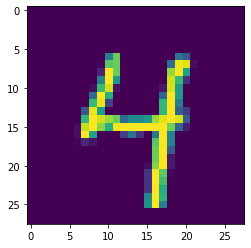

In [6]:
#visualize random data item
i=np.random.randint(1,len(train_datasets))
plt.imshow(train_datasets[i])
print(train_labels[i])

In [7]:
train_data = train_datasets.reshape(60000,28,28,1)
test_data = test_datasets.reshape(10000,28,28,1)

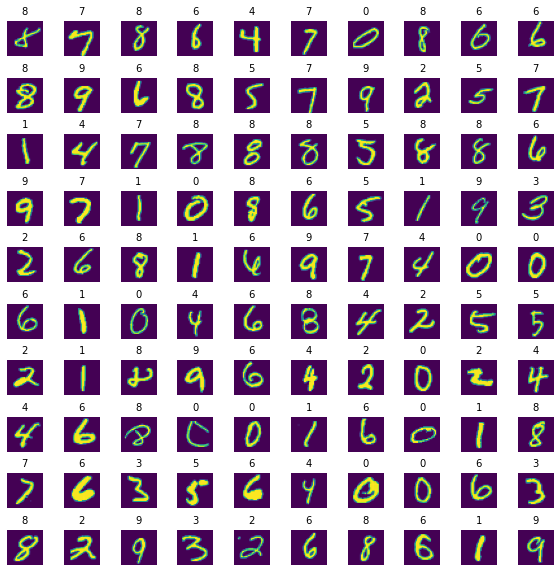

In [8]:
#view few more data items
W_grid=10
L_grid=10
fig,axes=plt.subplots(10,10,figsize=(10,10))
axes=axes.ravel()
n_training=len(train_datasets)
for i in range(0,L_grid*W_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(train_datasets[index])
    axes[i].set_title(train_labels[index],fontsize=10)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.6)

In [9]:
train_data = train_data.astype('float32') / 255.
test_data = test_data.astype('float32') / 255.


In [10]:
#understanding that we need to squeeze the image else we wont be able to see it
'''plt.imshow(train_data[2344].squeeze(),cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title(train_labels[2344],fontsize=20)'''

"plt.imshow(train_data[2344].squeeze(),cmap='gray',interpolation='nearest')\nplt.axis('off')\nplt.title(train_labels[2344],fontsize=20)"

# building layers using keras

In [11]:

from tensorflow.keras import datasets,layers,models

In [12]:
train_labels = to_categorical(train_labels, 10) 
test_labels = to_categorical(test_labels, 10)

In [13]:

model = models.Sequential() 
model.add(layers.Conv2D(32, kernel_size = (3, 3),activation = 'relu', input_shape = (28,28,1))) 
model.add(layers.Conv2D(64, (3, 3), activation = 'relu')) 
model.add(layers.MaxPooling2D(pool_size = (2, 2))) 
model.add(layers.Dropout(0.25)) 
model.add(layers.Flatten()) 
model.add(layers.Dense(128, activation = 'relu')) 
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(10, activation = 'softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
model.compile(loss = tensorflow.keras.losses.categorical_crossentropy,optimizer ='Adam', metrics = ['accuracy'])

In [15]:
history=model.fit(
   train_data, train_labels, 
   batch_size = 128, 
   epochs = 12, 
   verbose = 1, 
   validation_data = (test_data, test_labels)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 407s 7ms/sample - loss: 0.2467 - acc: 0.9246 - val_loss: 0.0551 - val_acc: 0.9821
Epoch 2/12
60000/60000 [==============================] - 517s 9ms/sample - loss: 0.0888 - acc: 0.9735 - val_loss: 0.0426 - val_acc: 0.9850
Epoch 3/12
60000/60000 [==============================] - 530s 9ms/sample - loss: 0.0680 - acc: 0.9797 - val_loss: 0.0394 - val_acc: 0.9872
Epoch 4/12
60000/60000 [==============================] - 519s 9ms/sample - loss: 0.0560 - acc: 0.9832 - val_loss: 0.0358 - val_acc: 0.9877
Epoch 5/12
60000/60000 [==============================] - 506s 8ms/sample - loss: 0.0484 - acc: 0.9849 - val_loss: 0.0350 - val_acc: 0.9892
Epoch 6/12
60000/60000 [==============================] - 480s 8ms/sample - loss: 0.0414 - acc: 0.9871 - val_loss: 0.0303 - val_acc: 0.9903
Epoch 7/12
60000/60000 [==============================] - 493s 8ms/sample - loss: 0.0362 - acc: 0.9887 - val_l

In [16]:
score=model.evaluate(test_data,test_labels)

10000/10000 [==============================] - 24s 2ms/sample - loss: 0.0296 - acc: 0.99200s - loss: 0.0298 - acc: 0.99


In [17]:
print('TEST ACCURACY {}'.format(score[1]))

TEST ACCURACY 0.9919999837875366


In [18]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

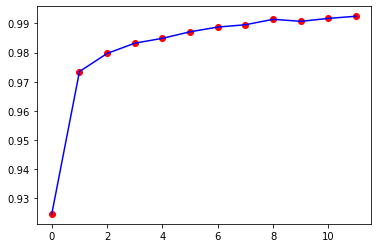

In [19]:

accuracy=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'ro',label='training accuracy')
plt.plot(epochs,accuracy,'b',label='validation accuracy')

In [20]:
predicted_classes=model.predict_classes(test_data)
y_true=test_labels

(-0.5, 27.5, 27.5, -0.5)

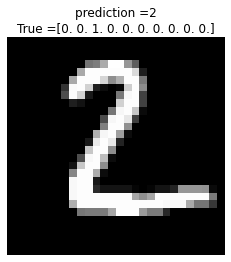

In [21]:

plt.imshow(test_data[1].squeeze(),cmap='gray')
plt.title('prediction ={}\nTrue ={}'.format(predicted_classes[1],y_true[1]))
plt.axis("off")

In [25]:
def function(i):
    plt.imshow(test_data[i].squeeze(),cmap='gray')
    plt.title('prediction ={}\nTrue ={}'.format(predicted_classes[i],y_true[i]))
    plt.axis("off")

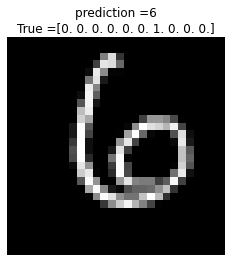

In [35]:
function(100)

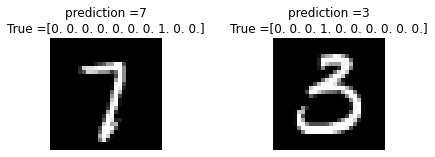

In [26]:
fig,axes=plt.subplots(1,2,sharex='all')

axes[0].imshow(test_data[234].squeeze(),cmap='gray')
axes[0].set_title('prediction ={}\nTrue ={}'.format(predicted_classes[234],y_true[234]))
axes[0].axis("off")

axes[1].imshow(test_data[343].squeeze(),cmap='gray')
axes[1].set_title('prediction ={}\nTrue ={}'.format(predicted_classes[343],y_true[343]))
axes[1].axis("off")
plt.subplots_adjust(hspace=0.7,wspace=1)